## Optimization TD1 - Notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from div import div
from grad import grad

In [2]:
def load_image(filename):
    return np.loadtxt(filename)

def display_image(image, title="Image"):
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.savefig(f"outputs/{title}.png")
    plt.show()

The image size is 512 x 512


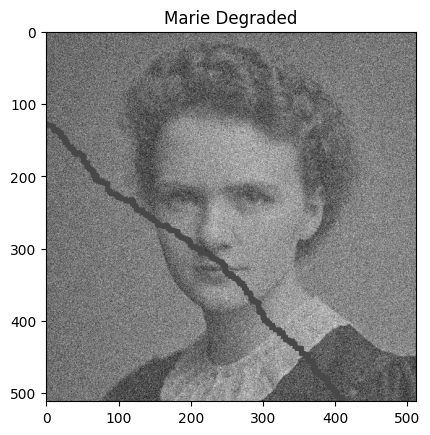

In [3]:
# Question 1

# load image
z = load_image("marie_degraded")

# image size
K, L = z.shape
print(f"The image size is {K} x {L}")

# display image
display_image(z, "Marie Degraded")

In [4]:
# Question 2

# indices corresponding to tearing
tear_mask = (z == 0)
indJ = np.where(tear_mask)
print(f"Tearing represents {100 * len(indJ[0]) / (K * L)} % of the image")

# indices of complementary area    
indI = np.where(~tear_mask)
print(f"Complementary represents {100 * len(indI[0]) / (K * L)} % of the image")

Tearing represents 2.05230712890625 % of the image
Complementary represents 97.94769287109375 % of the image


In [5]:
def gradient_algorithm(z, nitm, gamma):
    K, L = z.shape
    xr = z.copy()
    cost = []
    for nit in range(nitm):
        v, h = grad(xr)
        xr = xr - gamma * div(v, h)
        cost.append((np.linalg.norm(v, 'fro')**2 + np.linalg.norm(h, 'fro')**2) / 2)
        print(f"{nit+1} : cost={cost[-1]}")
    return xr, cost

1 : cost=23331.19083044444
2 : cost=4863.412293029236
3 : cost=2277.721318137188
4 : cost=1322.4164217001817
5 : cost=851.0253420111576
6 : cost=583.466412841434
7 : cost=418.4934906111997
8 : cost=311.0224048585747
9 : cost=238.183907324529
10 : cost=187.29975136578702
11 : cost=150.87596106868185
12 : cost=124.26409145736123
13 : cost=104.47077144984615
14 : cost=89.51007834174987
15 : cost=78.03210268072831
16 : cost=69.10059172719522
17 : cost=62.0550545126734
18 : cost=56.42268821432054
19 : cost=51.86070831282065
20 : cost=48.117777276838176
21 : cost=45.00773177602239
22 : cost=42.391401406186326
23 : cost=40.16385145900652
24 : cost=38.245321658228995
25 : cost=36.57471994943337
26 : cost=35.10490535865011
27 : cost=33.79923793529062
28 : cost=32.629035307470375
29 : cost=31.571683928992826
30 : cost=30.609227059610813
31 : cost=29.72730254189044
32 : cost=28.914339030590654
33 : cost=28.16094441339533
34 : cost=27.459438002775983
35 : cost=26.803490876452894
36 : cost=26.18784

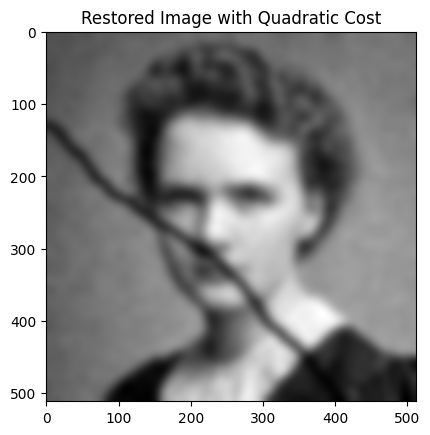

In [6]:
# Question 4
# gradient algorithm for minimizing g o L

nitm = 100 # maximum number of iterations
beta = 8 # Lipshitz constant of the gradient
gamma = 1.9 / beta # step-size of the algorithm
xr, cost = gradient_algorithm(z, nitm, gamma)
display_image(xr, "Restored Image with Quadratic Cost")

In [7]:
def projball2(xr, z, rho, indI):
    """
    Projection of xr onto the L2 ball || x(indI) - z(indI) || <= rho.

    Parameters:
    xr : ndarray (vector to be projected)
    z : ndarray (center of the ball)
    rho : float (radius of the ball)
    indI : ndarray (indices of constrained components)

    Returns:
    p : ndarray (projected vector)
    """
    p = xr.copy()
    no = np.linalg.norm(xr[indI] - z[indI])

    if no > rho:
        p[indI] = z[indI] + rho * (xr[indI] - z[indI]) / no

    return p

In [8]:
def projected_gradient_algorithm(z, nitm, rho, gamma, indI, prec=1e-7):
    xr = z.copy()
    cost = []
    
    for nit in range(nitm):
        v, h = grad(xr)
        xr = xr - gamma * div(v, h)
        xr = projball2(xr, z, rho, indI)

        cost.append((np.linalg.norm(v, 'fro')**2 + np.linalg.norm(h, 'fro')**2) / 2)
        print(f"{nit+1} : cost={cost[-1]}")

        if nit > 0 and abs((cost[-2] - cost[-1]) / cost[-1]) < prec:
            break

    return xr, cost

1 : cost=23331.19083044444
2 : cost=3400.5276877884253
3 : cost=1535.271222958903
4 : cost=796.8053755460219
5 : cost=517.021343513894
6 : cost=333.4560440176185
7 : cost=241.36847224555868
8 : cost=183.95344194639117
9 : cost=151.75222775406644
10 : cost=130.9144204616414
11 : cost=117.65058867125177
12 : cost=108.50656433984315
13 : cost=102.22103789943237
14 : cost=97.66543976547877
15 : cost=94.33315058303863
16 : cost=91.79619693793248
17 : cost=89.83150883933402
18 : cost=88.25958054308457
19 : cost=86.97600828731126
20 : cost=85.89949869097254
21 : cost=84.97874214494907
22 : cost=84.17451117265458
23 : cost=83.46044817707813
24 : cost=82.8165263663213
25 : cost=82.22860440490551
26 : cost=81.68590017731549
27 : cost=81.18048054340002
28 : cost=80.7062302022456
29 : cost=80.25848709588763
30 : cost=79.83359782410734
31 : cost=79.42868778625802
32 : cost=79.04145870697513
33 : cost=78.67004992484885
34 : cost=78.3129410118575
35 : cost=77.96886897822986
36 : cost=77.6367788326723

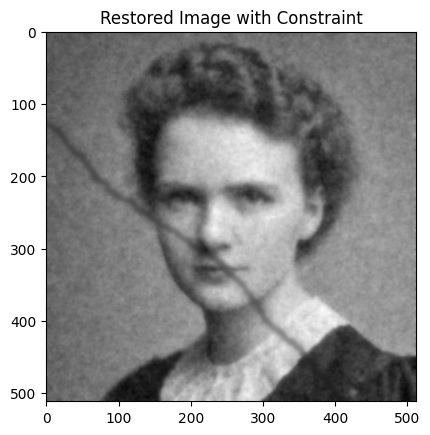

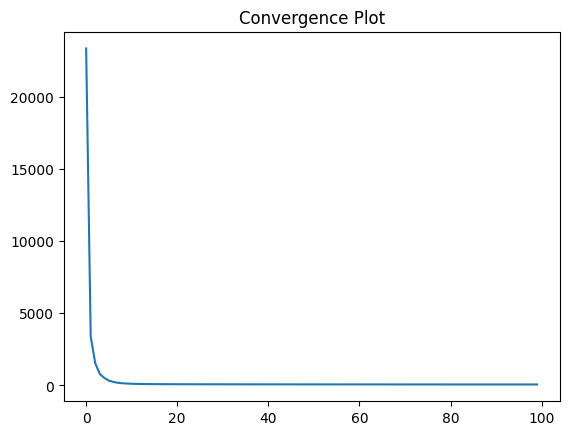

In [13]:
# Questions 6-8
# projected gradient algorithm for minimizing g o L subject to constraint

rho = 0.2 * np.sqrt(K * L)
precc = 1e-7; # precision for stopping criterion
xr, cost = projected_gradient_algorithm(z, nitm, rho, gamma, indI, precc)
display_image(xr, "Restored Image with Constraint")
plt.plot(cost)
plt.title("Convergence Plot")
plt.savefig("outputs/ConvergencePlot.png")
plt.show()